# Import Packages

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [ ]:
class_names = ['dermatofibroma','Healthy skin', 'squamous cell carcinoma', 'melanoma', 'Nevus pigmentous']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [ ]:
def load_data():

    datasets = ['C:/Users/Nikitha/Music/SKIN MGIT/SKIN MGIT/train', 'C:/Users/Nikitha/Music/SKIN MGIT/SKIN MGIT/test']

    output = []

    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/Nikitha/Music/SKIN MGIT/SKIN MGIT/train


100%|████████████████████████████████████████████████████████████████████████████████| 181/181 [00:01<00:00, 98.41it/s]


Loading C:/Users/Nikitha/Music/SKIN MGIT/SKIN MGIT/test


100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 114.32it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1109
Number of testing examples: 91
Each image is of size: (150, 150)


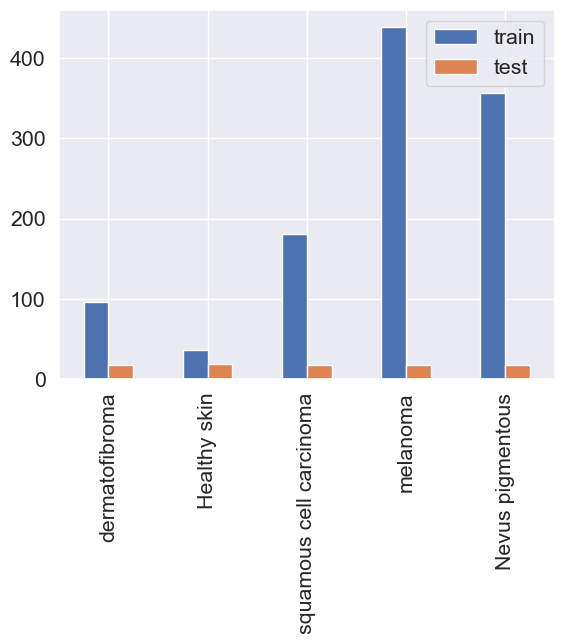

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_examples(class_names, images, labels):


    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=10)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

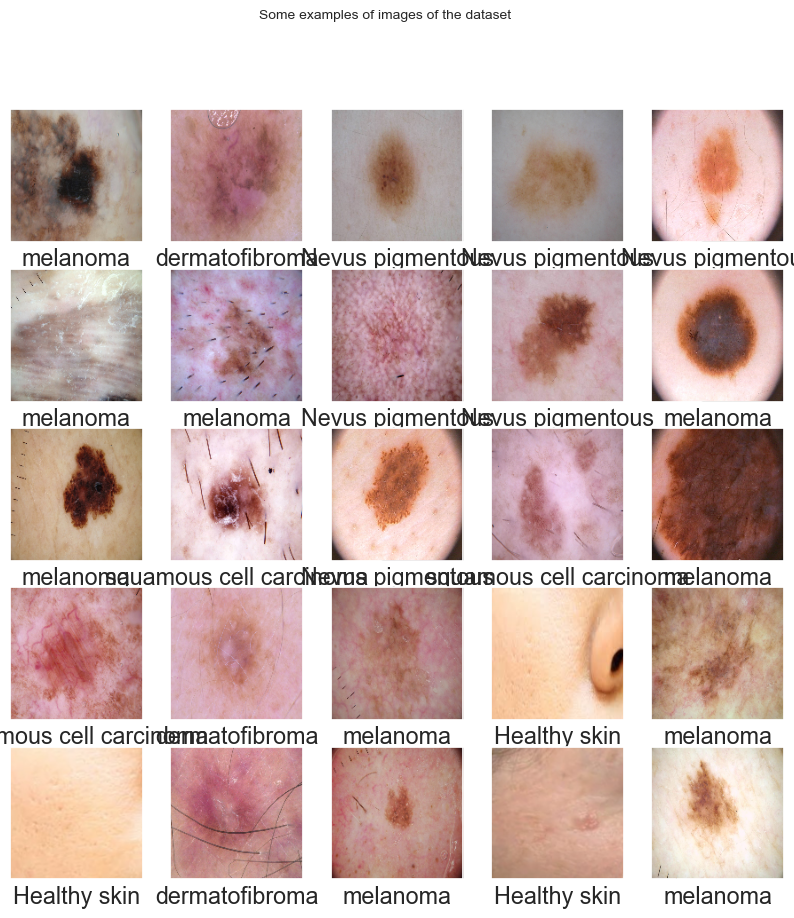

In [ ]:
display_examples(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30


7/7 [==============================] - 9s 1s/step - loss: 2.7115 - accuracy: 0.2097 - val_loss: 1.4857 - val_accuracy: 0.3919
Epoch 2/30
7/7 [==============================] - 6s 879ms/step - loss: 1.4123 - accuracy: 0.4036 - val_loss: 1.3657 - val_accuracy: 0.4550
Epoch 3/30
7/7 [==============================] - 6s 886ms/step - loss: 1.3365 - accuracy: 0.4262 - val_loss: 1.2771 - val_accuracy: 0.4730
Epoch 4/30
7/7 [==============================] - 6s 839ms/step - loss: 1.2498 - accuracy: 0.4791 - val_loss: 1.1962 - val_accuracy: 0.5045
Epoch 5/30
7/7 [==============================] - 6s 842ms/step - loss: 1.1602 - accuracy: 0.5096 - val_loss: 1.1379 - val_accuracy: 0.5090
Epoch 6/30
7/7 [==============================] - 6s 860ms/step - loss: 1.0686 - accuracy: 0.5400 - val_loss: 1.0815 - val_accuracy: 0.5225
Epoch 7/30
7/7 [==============================] - 6s 846ms/step - loss: 0.9855 - accuracy: 0.5806 - val_loss: 1.0426 - val_accuracy: 0.5405
Epoch 8/30
7/7 [=====

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 56ms/step - loss: 0.4228 - accuracy: 0.9011


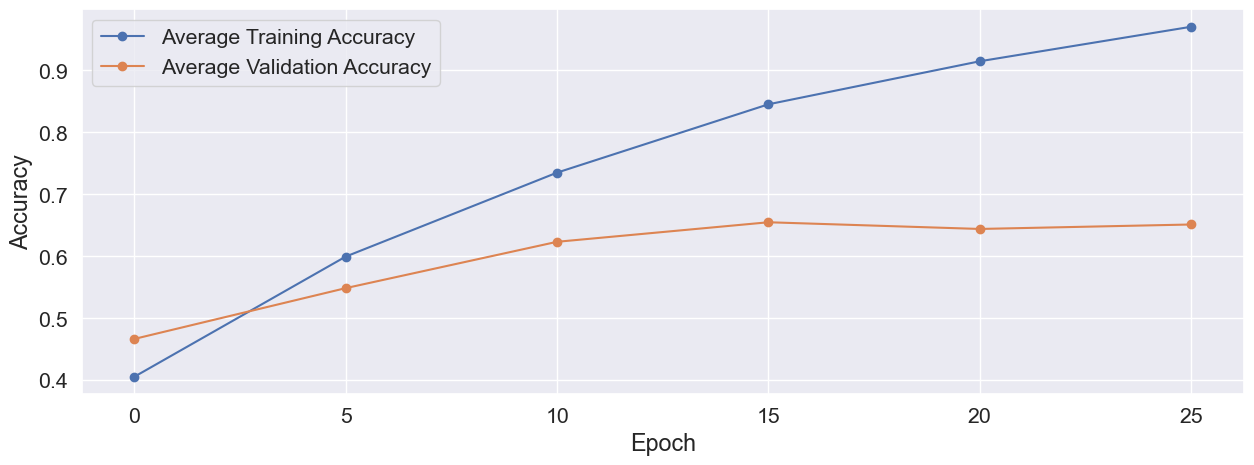

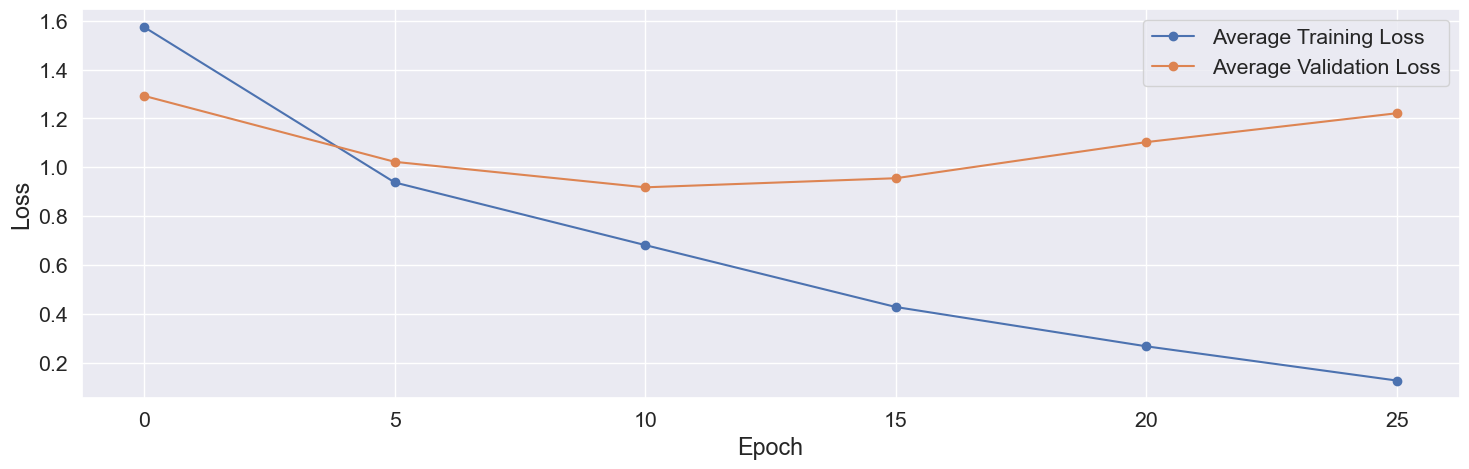

In [ ]:
import numpy as np

# Calculate average accuracy for every 5 epochs
avg_train_acc = [np.mean(history.history['accuracy'][i:i+5]) for i in range(0, len(history.history['accuracy']), 5)]
avg_val_acc = [np.mean(history.history['val_accuracy'][i:i+5]) for i in range(0, len(history.history['val_accuracy']), 5)]

# Plot average accuracy
plt.figure(figsize=(15,5))
plt.plot(avg_train_acc, marker='o')
plt.plot(avg_val_acc, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Average Training Accuracy', 'Average Validation Accuracy'])
plt.xticks(np.arange(0, len(avg_train_acc)), np.arange(0, len(avg_train_acc)) * 5)
plt.grid(True)
plt.show()
import numpy as np

# Assuming 'history' contains the metrics for loss, precision, and recall

# Calculate average loss, precision, and recall for every 5 epochs
avg_train_loss = [np.mean(history.history['loss'][i:i+5]) for i in range(0, len(history.history['loss']), 5)]
avg_val_loss = [np.mean(history.history['val_loss'][i:i+5]) for i in range(0, len(history.history['val_loss']), 5)]

# Plot average loss
plt.figure(figsize=(15,5))
plt.plot(avg_train_loss, marker='o')
plt.plot(avg_val_loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Average Training Loss', 'Average Validation Loss'])
plt.xticks(np.arange(0, len(avg_train_loss)), np.arange(0, len(avg_train_loss)) * 5)
plt.grid(True)

plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 50ms/step


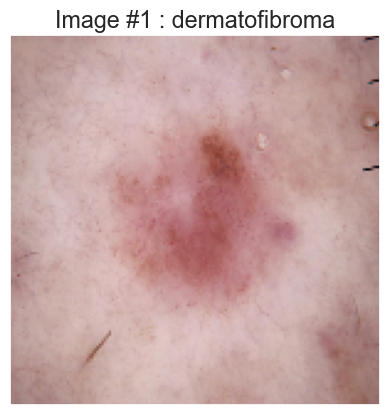

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

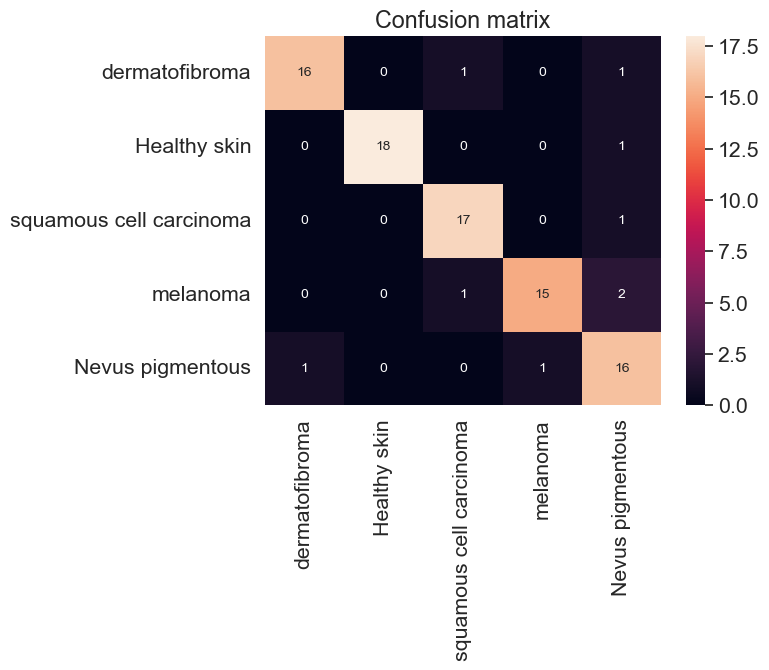

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision
precision = precision_score(test_labels, pred_labels, average='weighted')
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(test_labels, pred_labels, average='weighted')
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(test_labels, pred_labels, average='weighted')
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy: {:.2f}".format(accuracy))


Precision: 0.91
Recall: 0.90
F1 Score: 0.90
Accuracy: 0.90
